# 5. TensorFlow 入門 (分類)

## モデル構築方法
1. Sequential API: 入力層と出力層が 1 つの流れで繋がる線形スタック
2. Functional API: Conv 層での実装を Function として変数 x に格納し、人間の経験則に基づいて、ニューロン同士の接続を制御する
3. Subclassing API

In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.5/dist-packages (19.3.1)


In [2]:
!pip install tensorflow-gpu==2.0.0

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18374856349172711617, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6558715809904926141
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 863592776157860282
 physical_device_desc: "device: XLA_GPU device"]

In [5]:
print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('data/wine_class.csv')
df.head(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [8]:
x = df.iloc[:, 1:]
x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [9]:
t = df.iloc[:, 0]
t.head(3)

0    1
1    1
2    1
Name: Class, dtype: int64

In [10]:
x.shape

(178, 10)

In [11]:
t.shape

(178,)

In [12]:
type(x)

pandas.core.frame.DataFrame

In [13]:
type(x.values)

numpy.ndarray

In [14]:
t.min(), t.max()

(1, 3)

In [15]:
type(t)

pandas.core.series.Series

In [16]:
t = t.values - 1
x = x.values

In [17]:
type(x), type(t), t.min(), t.max()

(numpy.ndarray, numpy.ndarray, 0, 2)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x, t, train_size=0.7, random_state=0)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
len(x_train), len(x_val), len(t_train), len(t_val)

(124, 54, 124, 54)

In [20]:
x_train.shape, x_val.shape, t_train.shape, t_val.shape

((124, 10), (54, 10), (124,), (54,))

In [21]:
import os
import random

def reset_seed(seed=0):
    
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [22]:
reset_seed(0)

from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Dense(5, activation='relu', input_shape=(10, )))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
history = model.fit(x_train, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val, t_val))

Train on 124 samples, validate on 54 samples
Epoch 1/50
124/124 [==============================] - 1s 5ms/sample - loss: 378.8518 - accuracy: 0.3952 - val_loss: 372.8559 - val_accuracy: 0.4074
Epoch 2/50
124/124 [==============================] - 0s 238us/sample - loss: 346.3821 - accuracy: 0.3952 - val_loss: 340.0571 - val_accuracy: 0.4074
Epoch 3/50
124/124 [==============================] - 0s 231us/sample - loss: 315.6481 - accuracy: 0.3952 - val_loss: 308.5331 - val_accuracy: 0.4074
Epoch 4/50
124/124 [==============================] - 0s 232us/sample - loss: 285.7784 - accuracy: 0.3952 - val_loss: 278.6729 - val_accuracy: 0.4074
Epoch 5/50
124/124 [==============================] - 0s 239us/sample - loss: 258.1909 - accuracy: 0.3952 - val_loss: 250.6042 - val_accuracy: 0.4074
Epoch 6/50
124/124 [==============================] - 0s 227us/sample - loss: 230.7808 - accuracy: 0.3952 - val_loss: 223.6631 - val_accuracy: 0.4074
Epoch 7/50
124/124 [==============================] - 0s 

In [24]:
type(history.history)

dict

In [25]:
results = pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
45,0.588710,0.971674,0.537037,0.984521
46,0.588710,0.968821,0.537037,0.980410
47,0.596774,0.967926,0.537037,0.976416
48,0.596774,0.965223,0.537037,0.971907
49,0.596774,0.963993,0.537037,0.970491


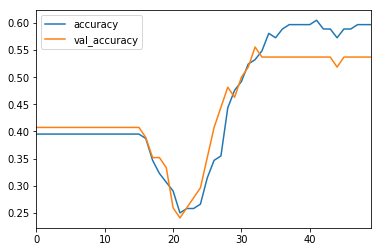

In [26]:
results[['accuracy', 'val_accuracy']].plot()

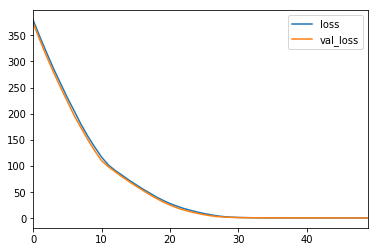

In [27]:
results[['loss', 'val_loss']].plot()

In [28]:
reset_seed(0)

from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.BatchNormalization(input_shape=(10, )))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
history = model.fit(x_train, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=0,
                   validation_data=(x_val, t_val))

In [30]:
results = pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
45,0.911290,0.403056,0.944444,0.345568
46,0.911290,0.384718,0.944444,0.340575
47,0.887097,0.442564,0.962963,0.337100
48,0.911290,0.374975,0.962963,0.331952
49,0.903226,0.375356,0.962963,0.327769


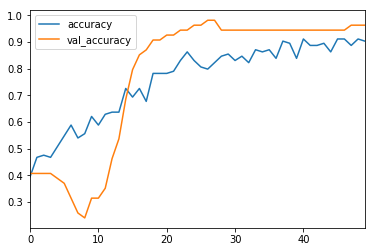

In [31]:
results[['accuracy', 'val_accuracy']].plot()

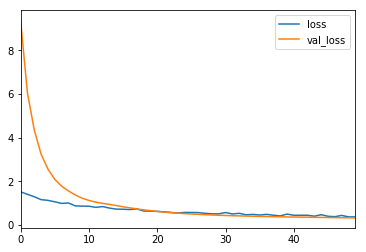

In [32]:
results[['loss', 'val_loss']].plot()

In [33]:
model.save('wine_class.h5')

In [34]:
del model

In [35]:
from tensorflow.keras.models import load_model

model = load_model('wine_class.h5')

In [36]:
x_new = x_train[0]

In [37]:
x_new.shape

(10,)

In [38]:
# y = model.predict(x_new) # ERROR

In [39]:
x_new = x_new[np.newaxis]

In [40]:
x_new.shape

(1, 10)

In [41]:
y = model.predict(x_new)

In [42]:
np.argmax(y)

0

# TensorFlow 入門 (回帰)

In [43]:
df = pd.read_csv('data/housing.csv')
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [44]:
x = df.iloc[:, :-1]
x.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [45]:
t = df.iloc[:, -1]
t.head(3)

0    24.0
1    21.6
2    34.7
Name: y, dtype: float64

In [46]:
x.shape, t.shape

((506, 13), (506,))

In [47]:
x = x.values
t = t.values

In [48]:
type(x), type(t)

(numpy.ndarray, numpy.ndarray)

In [49]:
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=0)

In [50]:
len(x_train), len(x_val), len(t_train), len(t_val)

(354, 152, 354, 152)

In [51]:
x_train.shape, x_val.shape, t_train.shape, t_val.shape

((354, 13), (152, 13), (354,), (152,))

In [52]:
reset_seed(0)

model = models.Sequential()

model.add(layers.BatchNormalization(input_shape=(13, )))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()

model.compile(loss='mean_squared_error', optimizer=opt)

In [53]:
history = model.fit(x_train, t_train,
                   batch_size=32,
                   epochs=50,
                   verbose=0,
                   validation_data=(x_val, t_val))

In [54]:
results = pd.DataFrame(history.history)
results.tail()

,loss,val_loss
45,112.651817,111.959804
46,113.845320,109.275275
47,108.117519,106.942764
48,101.137612,104.515397
49,102.411424,102.201149


(80, 100)

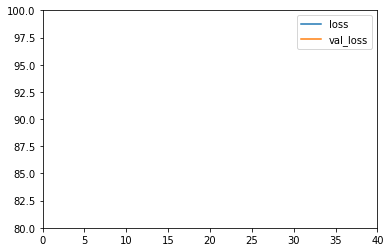

In [55]:
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0, 40])
graph.set_ylim([80, 100])

In [56]:
import seaborn as sns

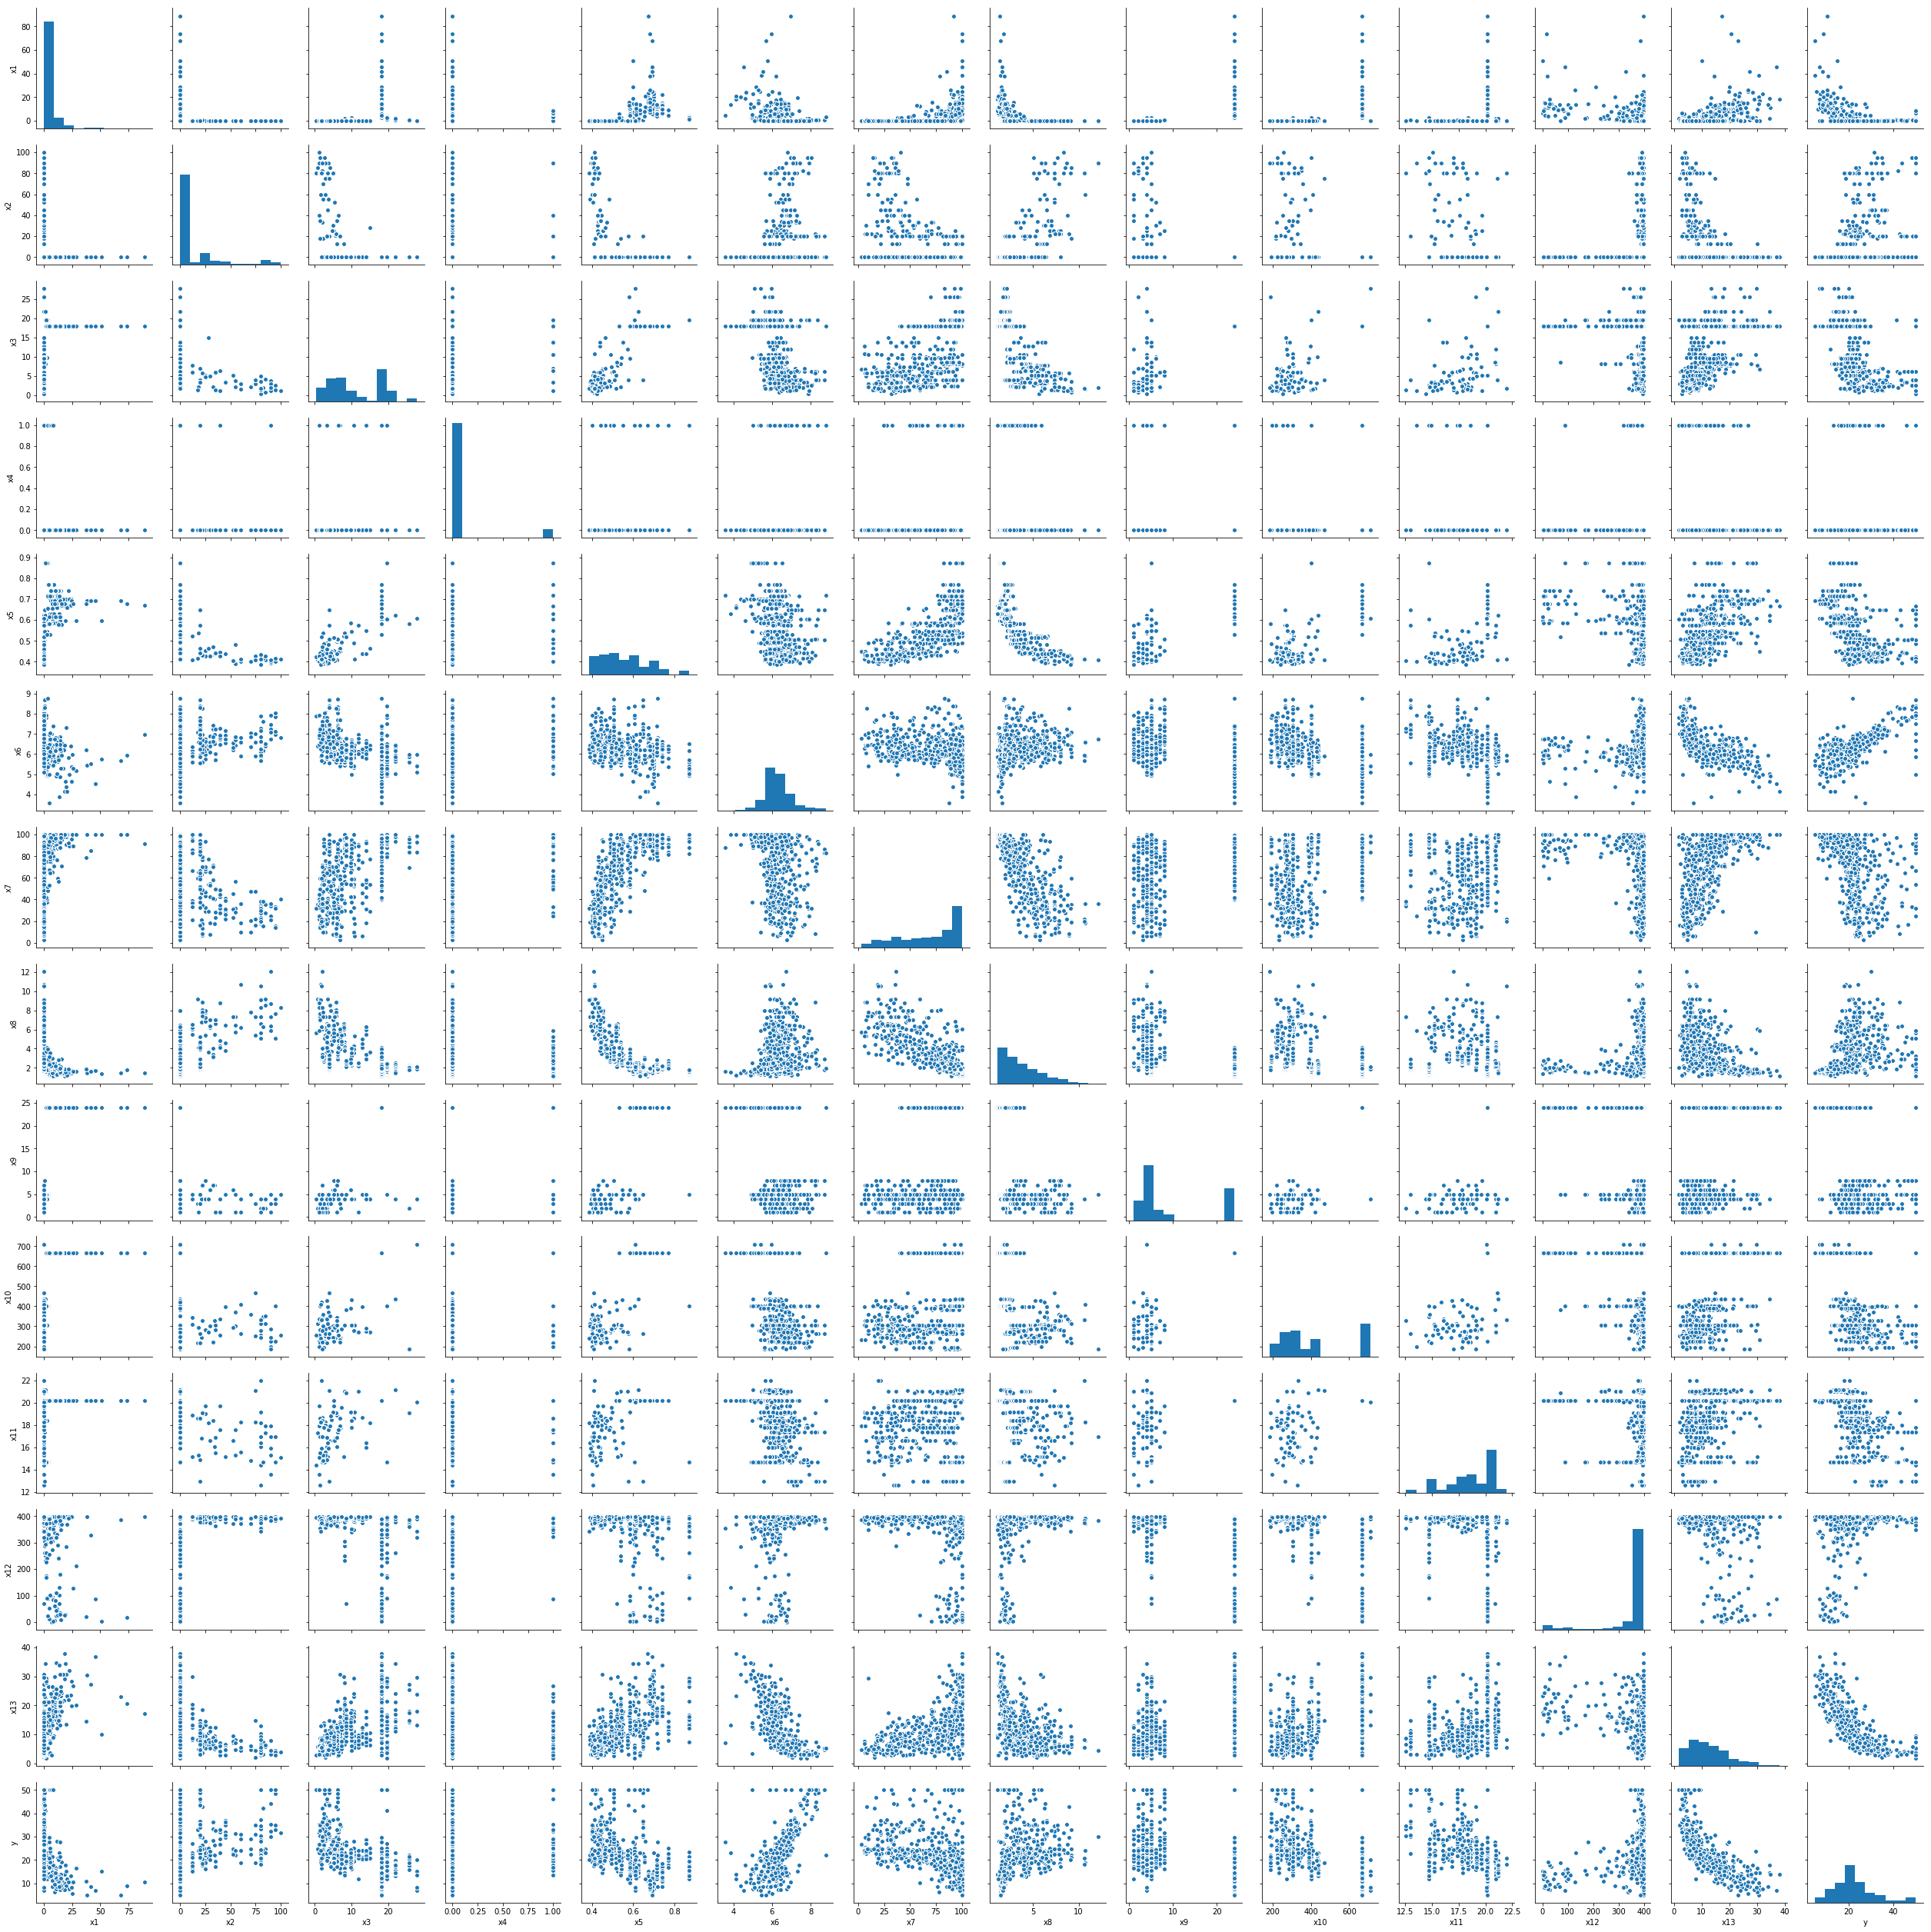

In [57]:
sns.pairplot(df)

In [58]:
df_corr = df.corr()
df_corr.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


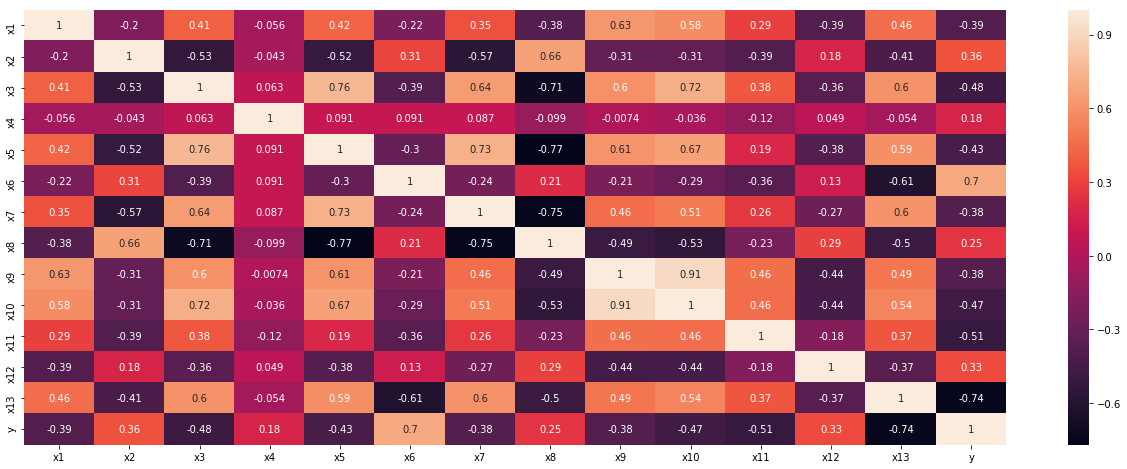

In [59]:
plt.figure(figsize=(22, 8))
sns.heatmap(df_corr, annot=True)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
_x_train = scaler.transform(x_train)
_x_val = scaler.transform(x_val)

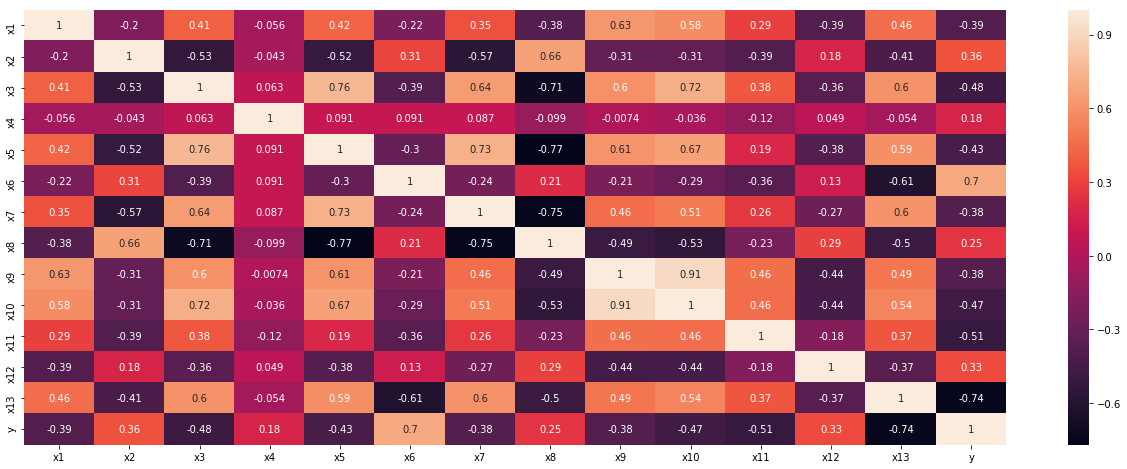

In [62]:
plt.figure(figsize=(22, 8))
sns.heatmap(df_corr, annot=True)

In [63]:
type(_x_train), type(_x_val)

(numpy.ndarray, numpy.ndarray)

In [64]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [65]:
df1 = df.drop('x4', axis=1)
df1.head(3)

,x1,x2,x3,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [66]:
del df['x4']
df.head(3)

,x1,x2,x3,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [67]:
x1 = df1.iloc[:, :-1]
x1.head(3)

,x1,x2,x3,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [68]:
t1 = df1.iloc[:, -1]
t1.head(3)

0    24.0
1    21.6
2    34.7
Name: y, dtype: float64

In [69]:
x1 = x1.values
t1 = t1.values

In [70]:
len(x1), len(t1), x1.shape, t1.shape, t1.shape

(506, 506, (506, 12), (506,), (506,))

In [71]:
_x_train1, _x_val1, _t_train1, _t_val1 = train_test_split(x1, t1, test_size=0.3, random_state=0)

In [72]:
_t_train2 = _t_train1
_t_val2 = _t_val1

In [73]:
scaler = StandardScaler()
scaler.fit(_x_train1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
_x_train2 = scaler.transform(_x_train1)
_x_val2 = scaler.transform(_x_val1)

In [75]:
df1_corr = df1.corr()
df1_corr.head(3)

,x1,x2,x3,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725


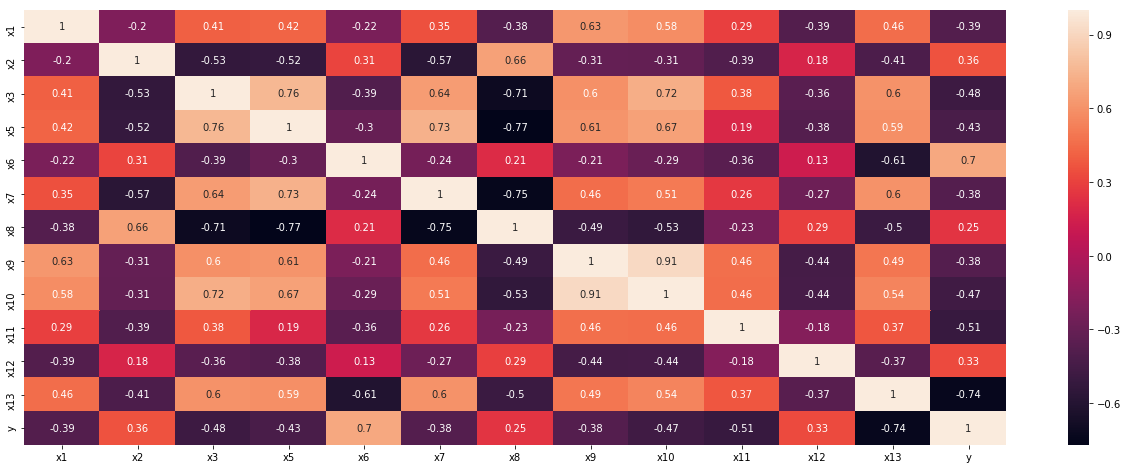

In [76]:
plt.figure(figsize=(22, 8))
sns.heatmap(df1_corr, annot=True)

In [77]:
reset_seed(0)

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(12, )))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1))

opt = keras.optimizers.Adam(0.01)

model.compile(loss='mean_squared_error', optimizer=opt)

In [78]:
history = model.fit(_x_train2, _t_train2,
                   batch_size=128,
                   epochs=300,
                   verbose=0,
                   validation_data=(_x_val2, _t_val2))

In [79]:
results = pd.DataFrame(history.history)
results.tail()

,loss,val_loss
295,7.141067,10.605984
296,4.548404,9.755606
297,5.679223,9.968395
298,7.484297,10.377038
299,4.183790,8.876542


(0, 100)

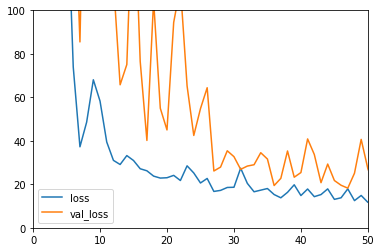

In [80]:
graph = results[['loss', 'val_loss']].plot()
graph.set_xlim([0, 50])
graph.set_ylim([0, 100])

In [81]:
np.sqrt(results.iloc[-1, 1])

2.9793526885421477

# 画像処理の基礎

In [82]:
from PIL import Image

In [83]:
img = Image.open('data/sample.png')

In [84]:
type(img)

PIL.PngImagePlugin.PngImageFile

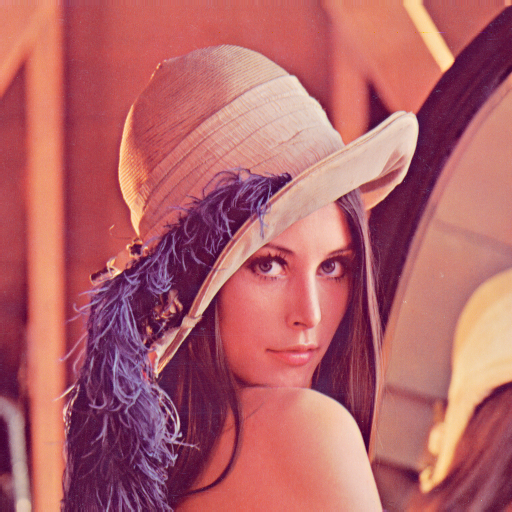

In [85]:
img

In [86]:
img = np.array(img)

In [87]:
type(img)

numpy.ndarray

In [88]:
img.shape

(512, 512, 3)

In [89]:
img.dtype

dtype('uint8')

In [90]:
import cv2

In [91]:
img = cv2.imread('data/sample.png')

In [92]:
type(img)

numpy.ndarray

In [93]:
img.shape

(512, 512, 3)

In [94]:
img.dtype

dtype('uint8')

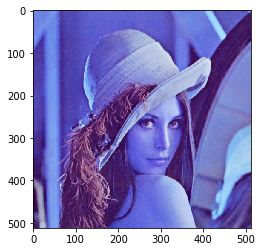

In [95]:
plt.imshow(img)

In [96]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

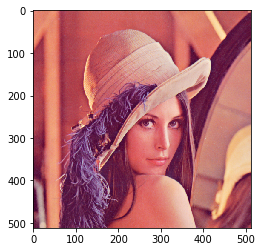

In [97]:
plt.imshow(img_rgb)

In [98]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

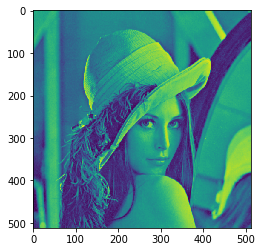

In [99]:
plt.imshow(img_gray)

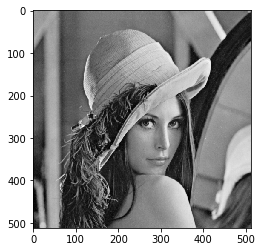

In [100]:
plt.gray()
plt.imshow(img_gray)

In [101]:
img_gray.shape

(512, 512)

In [102]:
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

In [103]:
img_conv = cv2.filter2D(img_gray, 0, kernel)

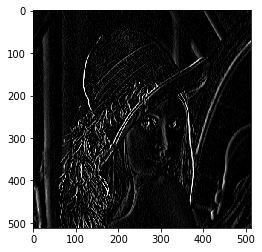

In [104]:
plt.gray()
plt.imshow(img_conv)

In [105]:
kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

In [106]:
img_conv2 = cv2.filter2D(img_gray, -1, kernel)

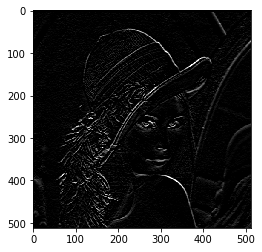

In [107]:
plt.gray()
plt.imshow(img_conv2)

# 画像のクラス分類 1

In [108]:
from tensorflow.keras.datasets import mnist

In [109]:
train, test = mnist.load_data()

In [110]:
type(train)

tuple

In [111]:
len(train)

2

In [112]:
train[0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [113]:
train[1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [114]:
train[1].shape

(60000,)

In [115]:
test[1].shape

(10000,)

In [116]:
type(train[0])

numpy.ndarray

In [117]:
train[0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [118]:
train[0][0].shape

(28, 28)

In [119]:
train[0].dtype

dtype('uint8')

In [120]:
type(train[1])

numpy.ndarray

In [121]:
train[1][1].shape

()

In [122]:
train[1].dtype

dtype('uint8')

In [123]:
img = train[0][0]

In [124]:
img.shape

(28, 28)

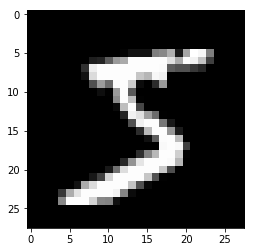

In [125]:
plt.gray()
plt.imshow(img)

In [126]:
train_x = train[0].reshape(60000, 28, 28, 1) /255
test_x  =  test[0].reshape(10000, 28, 28, 1)  /255

In [127]:
train_t = train[1]
test_t  =  test[1]

In [128]:
train_x[0].shape

(28, 28, 1)

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(3, (3, 3), activation='relu',
                       input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10 , activation='softmax'))

opt = keras.optimizers.Adam(0.01)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=opt,
             metrics=['accuracy'])

In [ ]:
batch_size = 4096
epochs = 30

history = model.fit(train_x, train_t, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(test_x, test_t)
                   )

In [ ]:
x = test[0][0]
t = test[1][0]

In [ ]:
t

In [ ]:
plt.imshow(x)

In [ ]:
type(x)

In [ ]:
type(test_x[0])

In [ ]:
x = np.array([test_x[0]])

In [ ]:
y = model.predict(x)

In [ ]:
y

In [ ]:
np.sum(y)

In [ ]:
np.argmax(y)

In [ ]:
x = test[0][33]
t = test[1][33]

In [ ]:
t

In [ ]:
plt.imshow(x)

In [ ]:
x = np.array([test_x[33]])
y = model.predict(x)
np.argmax(y)

## 8.6. 演習課題

学習済みモデルで得られたフィルタの値を取得し、各画像に対して畳み込み（Convolution）を実行し、数字をうまく分類できるようなフィルタはどのような画像になっているか確かめてみましょう。

ヒント：
今回のモデルのパラメータは下記で取得できます。

In [ ]:
w = model.layers[0].get_weights()[0]

In [ ]:
w

In [ ]:
model.summary()

# 画像のクラス分類 2

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(train_x, train_t), (test_x, test_t) = cifar10.load_data()

In [ ]:
len(train_x)

In [ ]:
len(test_x)

In [ ]:
train_x.shape

In [ ]:
train_x.dtype

In [ ]:
plt.imshow(train_x[0])

In [ ]:
plt.imshow(train_x[1])

In [ ]:
train_t.shape

In [ ]:
type(train_t)

In [ ]:
train_t.dtype

In [ ]:
train_t[0]

In [ ]:
train_t.shape

In [ ]:
from tensorflow.keras.utils import to_categorical

train_x = train_x / 255
test_x  = test_x  / 255

In [ ]:
# train_x

In [ ]:
reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu',
                       padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu',
                       padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu',
                       padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256, (3, 3), activation='relu',
                       padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [ ]:
# model.fit(train_x, train_t,
#          batch_size = 4096,
#          epochs=30,
#          verbose=1,
#          validation_data=(test_x, test_t))

In [ ]:
# results[['accuracy', 'val_accuracy']].plot()

# 演習課題

## 犬と猫の分類問題

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from glob import glob

In [ ]:
dog_filepaths = glob('data/dog/*.jpg')
# dog_filepaths

In [ ]:
cat_filepaths = glob('data/cat/*.jpg')
# cat_filepaths

In [ ]:
dog_filepath = dog_filepaths[0]
dog_filepath

In [ ]:
img = Image.open(dog_filepath)
img = np.array(img)

In [ ]:
img.shape

In [ ]:
img.dtype

In [ ]:
_t = np.array(0)
_t

In [ ]:
x, t = [], []

for filepath in dog_filepaths:
    img = Image.open(filepath)
    x.append(np.array(img))
    t.append(0)
    
for filepath in cat_filepaths:
    img = Image.open(filepath)
    x.append(np.array(img))
    t.append(1)

In [ ]:
len(x), len(t), type(x), type(t)

In [ ]:
_x = np.array(x)
_t = np.array(t)

In [ ]:
type(_x), type(_t)

In [ ]:
_x.shape

In [ ]:
x = _x / 255

In [ ]:
train_x, test_x, train_t, test_t = train_test_split(x, _t, test_size=0.3, random_state=0)
len(train_x), len(test_x), len(train_t), len(test_t)

In [ ]:
reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(4, (3, 3), activation='relu',
                       padding='same', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(8, (3, 3), activation='relu',
                       padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(16, (3, 3), activation='relu',
                       padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                       padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu',
                       padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [ ]:
# history = model.fit(train_x, train_t,
#                    batch_size=128,
#                    epochs=50,
#                    verbose=1,
#                    validation_data=(test_x, test_t))

In [ ]:
# val_accuracy = 0.5067 --> 局所解にハマってるパターン
# TODO: 
# 1. Image Pre-processing
# 2. Tune Hyper Parameters
#    - #filters
#    - kernel size
#    - #stride
#    - #padding
#    - optimizer
#    - batch size
#    - #epochs

# Subclassing API の使い方

In [ ]:
train, test = mnist.load_data()

In [ ]:
ScAPI_train_x = train[0].reshape(60000, 28, 28, 1) / 255
ScAPI_test_x  =  test[0].reshape(10000, 28, 28, 1) / 255

In [ ]:
from tensorflow.keras.utils import to_categorical
ScAPI_train_t = to_categorical(train[1])
ScAPI_test_t  = to_categorical(test[1])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
reset_seed(0)

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10 , activation='softmax')
        
    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

In [ ]:
model = MyModel()

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(ScAPI_train_x, ScAPI_train_t,
                   batch_size=4096,
                   epochs=30,
                   verbose=1,
                   validation_data=(ScAPI_test_x, ScAPI_test_t))

In [ ]:
results = pd.DataFrame(history.history)

In [ ]:
results[['loss', 'val_loss']].plot()

In [ ]:
results[['accuracy', 'val_accuracy']].plot()

In [ ]:
results.tail()

# 時系列解析の基礎

In [ ]:
!pip install -U 'pandas_datareader'

In [ ]:
from pandas_datareader.yahoo.daily import YahooDailyReader
import datetime

In [ ]:
date_st = datetime.datetime(2014, 1, 1)
date_fn = datetime.datetime(2019, 12, 25)

In [ ]:
df1 = YahooDailyReader('MSFT', date_st, date_fn).read()

In [ ]:
df1.head()

In [ ]:
symbols = [
    'AAPL',
    'MSFT',
    'GOOGL'
]

In [ ]:
df2 = [YahooDailyReader(symbol, date_st, date_fn).read() for symbol in symbols]

In [ ]:
# df2.head()

# ---------------------------------------------------------------------------
# AttributeError                            Traceback (most recent call last)
# <ipython-input-212-419c79c3c721> in <module>()
# ----> 1 df2.head()

# AttributeError: 'list' object has no attribute 'head'

In [ ]:
df2 = pd.concat(dfs, axis=0, keys=symbols).unstack(0)

In [ ]:
df2.head()

In [ ]:
df2.tail()

In [ ]:
type(df2)

In [ ]:
df2['Close'].plot()

In [ ]:
from fbprophet import Prophetophet

In [ ]:
model = Prophet()

In [ ]:
df1.head(3)

In [ ]:
df1.reset_index().head(3)

In [ ]:
data = df1.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
data.head(3)

In [ ]:
model.fit(data)

In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast.head()

In [ ]:
forecast.tail()

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
model.plot_components(forecast)
plt.show()

# 時系列解析で分類

## 1 変数の NN を使用

In [ ]:
ts = df1['Close'].values

In [ ]:
ts

In [ ]:
ts.shape

In [ ]:
x, t = [], []
for i in range(len(ts) - 1):
    x.append(ts[i])
    if ts[i] < ts[i+1]:
        t.append(1)
    else:
        t.append(0)

In [ ]:
x = np.array(x)
t = np.array(t)

In [ ]:
x.shape

In [ ]:
train_x, val_x, train_t, val_t = train_test_split(x, t, train_size=0.7, test_size=0.3, 
                                                  shuffle=False)

In [ ]:
reset_seed(0)

model = models.Sequential()

model.add(layers.Dense(10, input_shape=(1,), activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, 
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_t,
                   batch_size=128,
                   epochs=20,
                   verbose=0,
                   validation_data=(val_x, val_t), shuffle=False)

In [ ]:
results = pd.DataFrame(history.history)

In [ ]:
results.tail()

In [ ]:
results[['accuracy', 'val_accuracy']].plot()

In [ ]:
results[['loss', 'val_loss']].plot()

## LSTM (RNN)

In [ ]:
x = np.array(x).reshape(len(x), 1, 1)

In [ ]:
x.shape

In [ ]:
train_x, val_x, train_t, val_t = train_test_split(x, t, train_size=0.7,  test_size=0.3, shuffle=False)

In [ ]:
reset_seed(0)

model = models.Sequential()

model.add(layers.LSTM(10, input_shape=(1, 1), activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,
             metric=['accuracy'])

In [ ]:
history = model.fit(train_x, train_t,
                   batch_size=256,
                   epochs=20,
                   verbose=1,
                   validation_data=(val_x, val_t),  shuffle=False)

In [ ]:
results = pd.DataFrame(history.history)

results[['loss', 'val_loss']].plot()

In [ ]:
results[['accuracy', 'val_accuracy']].plot()